## kNN для задачи классификации с весами

In [5]:
from sklearn.datasets import make_moons

In [6]:
X, y = make_moons(n_samples = 50, random_state = 6)
display(X,y)

array([[ 2.00000000e+00,  5.00000000e-01],
       [ 1.38268343e+00, -4.23879533e-01],
       [ 1.13052619e+00, -4.91444861e-01],
       [-9.91444861e-01,  1.30526192e-01],
       [ 6.08761429e-01,  7.93353340e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 7.07106781e-01,  7.07106781e-01],
       [ 6.17316568e-01, -4.23879533e-01],
       [-2.58819045e-01,  9.65925826e-01],
       [ 2.92893219e-01, -2.07106781e-01],
       [ 1.99144486e+00,  3.69473808e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-7.93353340e-01,  6.08761429e-01],
       [ 9.23879533e-01,  3.82683432e-01],
       [ 1.50000000e+00, -3.66025404e-01],
       [ 7.61204675e-02,  1.17316568e-01],
       [ 1.70710678e+00, -2.07106781e-01],
       [ 2.06646660e-01, -1.08761429e-01],
       [ 1.96592583e+00,  2.41180955e-01],
       [-6.08761429e-01,  7.93353340e-01],
       [-9.23879533e-01,  3.82683432e-01],
       [ 1.33974596e-01,  0.00000000e+00],
       [ 1.25881905e+00, -4.65925826e-01],
       [-7.

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6, test_size =5)
X_train.shape, X_test.shape

((45, 2), (5, 2))

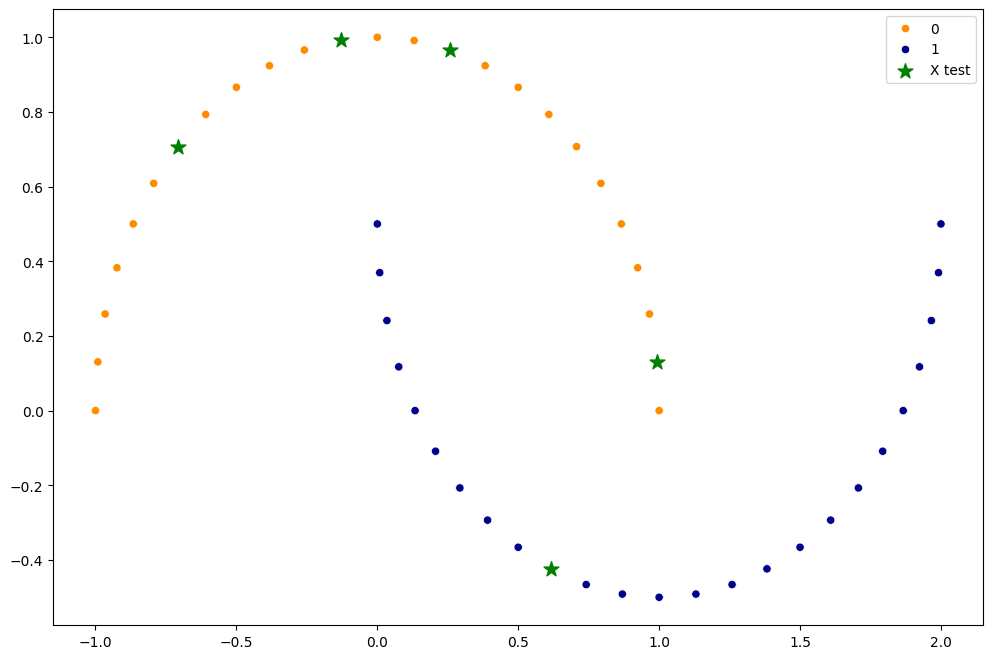

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#colormap
cmap_bold = ['darkorange','darkblue']

plt.figure(figsize = (12,8))
sns.scatterplot(x = X_train[ : ,0], y = X_train[ : , 1], hue = y_train, palette = cmap_bold)
plt.scatter(X_test[ : ,0], X_test[ : ,1], c= 'g', marker = '*', s =125, label = 'X test')
plt.legend()

## Обучаем модель на большом количестве соседей

In [9]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 20
model = KNeighborsClassifier( n_neighbors = n_neighbors)

In [10]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [11]:
pred_test = model.predict(X_test)
pred_test

array([0, 1, 0, 0, 1], dtype=int64)

In [24]:
y_test

array([0, 0, 0, 0, 1], dtype=int64)

In [15]:
model.score(X_train, y_train)

0.8444444444444444

## Пробуем на меньшем числе K соседей

In [18]:
n_neighbors = 4
model = KNeighborsClassifier( n_neighbors = n_neighbors)

In [19]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
pred_test = model.predict(X_test)
pred_test

array([0, 0, 0, 0, 1], dtype=int64)

In [20]:
model.score(X_train, y_train)

1.0

In [22]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,pred_test)
# супер

1.0

## Wieghts <> uniform

In [31]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [33]:
n_neighbors = 20
model = KNeighborsClassifier(n_neighbors, weights = 'distance')

In [34]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [37]:
pred_test = model.predict(X_test)
display(pred_test,y_test)


array([0, 0, 0, 0, 1], dtype=int64)

array([0, 0, 0, 0, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,pred_test)
# супер, модель выдает правильную классификацию даже на 20-ти соседях

1.0

## kNN для задачи регрессии

In [79]:
 from sklearn.datasets import make_regression
 import numpy as np
 np.random.seed(8)

In [80]:
def func(x):
    return 0.03*x**3 + 0.2*x**2

In [81]:
X = np.linspace(-10,10,50).reshape(-1,1)

In [82]:
X

array([[-10.        ],
       [ -9.59183673],
       [ -9.18367347],
       [ -8.7755102 ],
       [ -8.36734694],
       [ -7.95918367],
       [ -7.55102041],
       [ -7.14285714],
       [ -6.73469388],
       [ -6.32653061],
       [ -5.91836735],
       [ -5.51020408],
       [ -5.10204082],
       [ -4.69387755],
       [ -4.28571429],
       [ -3.87755102],
       [ -3.46938776],
       [ -3.06122449],
       [ -2.65306122],
       [ -2.24489796],
       [ -1.83673469],
       [ -1.42857143],
       [ -1.02040816],
       [ -0.6122449 ],
       [ -0.20408163],
       [  0.20408163],
       [  0.6122449 ],
       [  1.02040816],
       [  1.42857143],
       [  1.83673469],
       [  2.24489796],
       [  2.65306122],
       [  3.06122449],
       [  3.46938776],
       [  3.87755102],
       [  4.28571429],
       [  4.69387755],
       [  5.10204082],
       [  5.51020408],
       [  5.91836735],
       [  6.32653061],
       [  6.73469388],
       [  7.14285714],
       [  7

In [83]:
X =X.reshape(-1,1)

In [90]:
y = func(X) + np.random.randn(50,1)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12, test_size =5)


In [92]:
X_train.shape, X_test.shape

((45, 1), (5, 1))

In [93]:
X_train

array([[  1.83673469],
       [ -1.42857143],
       [  9.59183673],
       [ -2.24489796],
       [ -6.73469388],
       [ -3.06122449],
       [  5.51020408],
       [  5.10204082],
       [ -3.87755102],
       [  2.65306122],
       [ -4.28571429],
       [  0.6122449 ],
       [ -6.32653061],
       [  3.46938776],
       [  9.18367347],
       [ -1.83673469],
       [ -3.46938776],
       [ -0.20408163],
       [  7.14285714],
       [  3.06122449],
       [  4.28571429],
       [ -0.6122449 ],
       [ -9.59183673],
       [  2.24489796],
       [ -8.36734694],
       [  7.95918367],
       [  5.91836735],
       [ -2.65306122],
       [  6.32653061],
       [  7.55102041],
       [-10.        ],
       [ -5.91836735],
       [ 10.        ],
       [  3.87755102],
       [  0.20408163],
       [ -4.69387755],
       [ -7.95918367],
       [ -1.02040816],
       [ -5.10204082],
       [  8.36734694],
       [ -8.7755102 ],
       [ -9.18367347],
       [ -7.55102041],
       [  1

In [94]:
X_train, y_train

(array([[  1.83673469],
        [ -1.42857143],
        [  9.59183673],
        [ -2.24489796],
        [ -6.73469388],
        [ -3.06122449],
        [  5.51020408],
        [  5.10204082],
        [ -3.87755102],
        [  2.65306122],
        [ -4.28571429],
        [  0.6122449 ],
        [ -6.32653061],
        [  3.46938776],
        [  9.18367347],
        [ -1.83673469],
        [ -3.46938776],
        [ -0.20408163],
        [  7.14285714],
        [  3.06122449],
        [  4.28571429],
        [ -0.6122449 ],
        [ -9.59183673],
        [  2.24489796],
        [ -8.36734694],
        [  7.95918367],
        [  5.91836735],
        [ -2.65306122],
        [  6.32653061],
        [  7.55102041],
        [-10.        ],
        [ -5.91836735],
        [ 10.        ],
        [  3.87755102],
        [  0.20408163],
        [ -4.69387755],
        [ -7.95918367],
        [ -1.02040816],
        [ -5.10204082],
        [  8.36734694],
        [ -8.7755102 ],
        [ -9.183

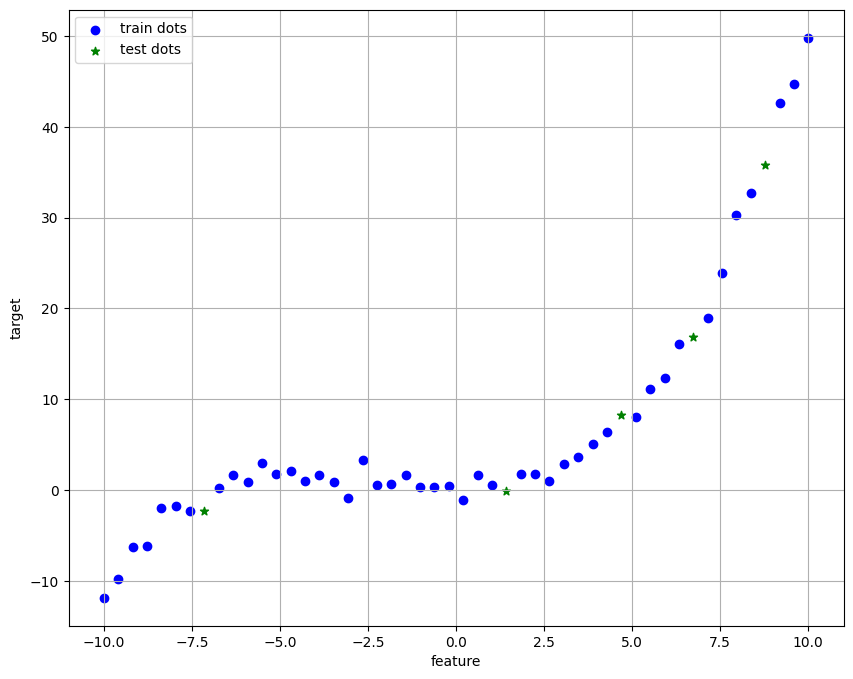

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, c='b', marker = 'o', label ='train dots')
plt.scatter(X_test, y_test, c='g', marker = '*', label ='test dots')
plt.grid()
plt.ylabel('target')
plt.xlabel('feature')
plt.legend();

## Инициализируем модель

In [112]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 20
model = KNeighborsRegressor( n_neighbors = n_neighbors )

In [113]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [114]:
pred_test = model.predict(X_test)

In [115]:
pred_test

array([[ 3.10565549],
       [15.76165893],
       [-1.18010214],
       [15.76165893],
       [11.00165585]])

In [117]:
from sklearn.metrics import r2_score
r2_score(pred_test, y_test)


-0.7999623792212742

In [118]:
prev_pred_test = pred_test.copy()

## R-квадрат получился неудачным (хотя бы 0.5)

In [119]:
n_neighbors = 20
model = KNeighborsRegressor( n_neighbors = n_neighbors, weights = 'distance' )

In [120]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [121]:
pred_test = model.predict(X_test)

In [122]:
display(X_test)

array([[ 1.42857143],
       [ 8.7755102 ],
       [-7.14285714],
       [ 6.73469388],
       [ 4.69387755]])

In [123]:
r2_score(pred_test, y_test)

0.9297298361150784

In [124]:
r2_score(prev_pred_test, y_test)

-0.7999623792212742

## callable объект в атрибуте weights kNN

In [163]:
def cust_dist(dists):
    return 0.22**dists

In [164]:
n_neighbors = 20
model = KNeighborsRegressor(n_neighbors = n_neighbors, weights = cust_dist)

In [165]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20,
                    weights=<function cust_dist at 0x00000267D8BE6D40>)

In [166]:
pred_test = model.predict(X_test)

In [167]:
r2_score(pred_test,y_test)

0.9922036684100857

## R2 практически 1 с кастомной функцией